# Problem Statement
### The goal here is to find the chance of admission of a candidate based on his/her GRE score, TOEFL score, rating of the university in which he/she is trying to get admission,strength of the SOP,Strength of the letter of the recommendation, CGPA and the research experience

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
df=pd.read_csv("..\Desktop\Ml-Project\Admission_Prediction.csv")  # importing the data set

In [3]:
df.head()   # first five data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape  #how many rows and column dataset have

(500, 9)

In [5]:
df.info()   #printing the summary of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.isna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()  #finding the count of missing values from different columns

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df['GRE Score'].mode()

0    312
dtype: int64

In [9]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)

In [10]:
df['TOEFL Score'].mode()

0    110
dtype: int64

In [11]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)

In [12]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [13]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [14]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

 now no nan values present in the data set

In [15]:
print(df.columns.values)

['Serial No.' 'GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR '
 'CGPA' 'Research' 'Chance of Admit ']


In [16]:
x=df.drop(['Chance of Admit ','Serial No.'],axis=1)
y=df['Chance of Admit ']
# here we are droping the Chance of Admit and serial no, as they are not going to be used for the features 
# Chance of Admit is the target column which shows the probalility of admission for a candidate.

In [17]:
x.head() # checking the transformed feature column

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


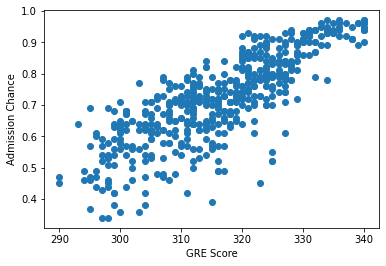

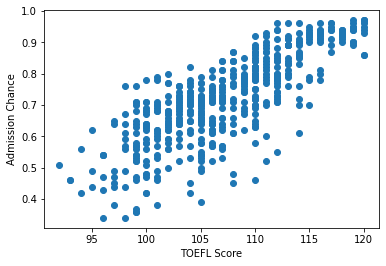

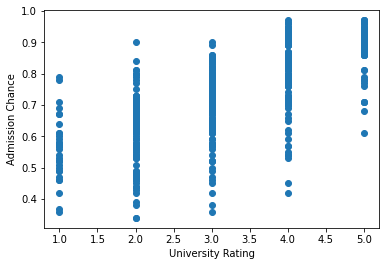

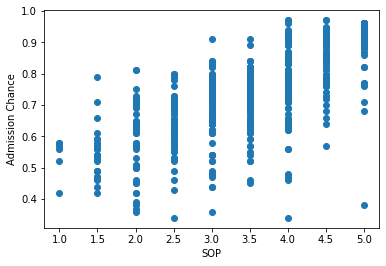

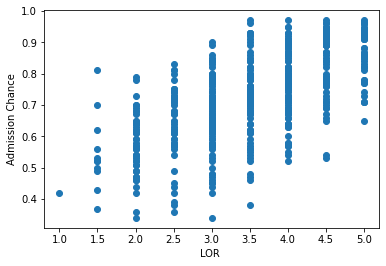

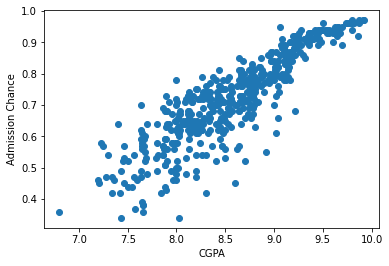

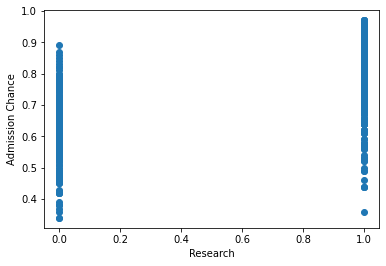

In [18]:
#python code
#showcasing the relationship between all the columns and the label 
for col in x.columns:
    if(col !=['Chance of Admit']):
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel('Admission Chance')
        plt.show()
# checking the movement of the dataset
# here we are checking whether the columns selected are best fitted column , whether they are having some relationship with y or not.

In [19]:
# to be only used if you want to scale the data,standize the data,if the variation is huge in the dataset
# when we have huge variation in the data set
# i am not changing the data , i am changing the scale only like taking logs, sqrt--not changing the actual meaning of the data set
# variance betweeen the dataset become very low
# machine will understand in better way this data  as having low variance in the data set

from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_lablel=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaled_data

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [20]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)
# finding mi c1 , m2 c2,.....

In [21]:
# fitting the data to the linear regression model
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [22]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

0.8082585452743907

getting accuracy almost 80%

# changing the hyper parameters

In [23]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=100)
# finding mi c1 , m2 c2,....

In [24]:
# fitting the data to the linear regression model
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [25]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

0.8168692395784946

# saving the model to the local file system
pickle library- used to convert object into bytecode - called serialization
deserialization- converting bytecode to object

In [26]:
filename='finalized_model.pickle'
pickle.dump(reg,open(filename,'wb'))

In [27]:
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict([[300,110,5,5,5,10,1]])
a[0]

0.9266887832866619

In [28]:
a=loaded_model.predict([[320,120,5,5,5,10,1]])
a[0]

0.9883894288600066